# Story Evaluation Results Visualization

This notebook visualizes story evaluation results.


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")


In [91]:
# Load data
df = pd.read_csv('../dataset/results/Llama-3.1-8B-Instruct-result.csv')
print(f"Total entries: {len(df)}")
print(f"\nEntries per model:")
print(df['model'].value_counts().sort_index())
print(f"\nColumns: {df.columns.tolist()}")
df.head()


Total entries: 767

Entries per model:
model
claude-opus-4                   96
deepseek-ai/DeepSeek-R1-0528    96
gemini-2.5-pro-exp-03-25        96
gpt-4.5-preview                 96
moonshotai/Kimi-K2-Instruct     96
o3                              95
openrouter/horizon-alpha        96
zai-org/GLM-4.5                 96
Name: count, dtype: int64

Columns: ['index', 'model', 'Grammar, spelling, and punctuation quality_score', 'Sentence pattern variety_score', 'Avoidance of clichés and overused phrases_score', 'Clarity and understandability_score', 'Logical connection between events and ideas_score', "Internal consistency within the story's context_score", 'Scene construction and purpose_score', 'Avoidance of predictable narrative tropes_score', 'Ability to hold reader interest_score', 'Character consistency_score', 'Character motivation and actions making sense_score', 'Natural dialogue_score', 'Character depth and dimensionality_score', 'Realistic character interactions_score', 'cre

,index,model,"Grammar, spelling, and punctuation quality_score",Sentence pattern variety_score,Avoidance of clichés and overused phrases_score,Clarity and understandability_score,Logical connection between events and ideas_score,Internal consistency within the story's context_score,Scene construction and purpose_score,Avoidance of predictable narrative tropes_score,Ability to hold reader interest_score,Character consistency_score,Character motivation and actions making sense_score,Natural dialogue_score,Character depth and dimensionality_score,Realistic character interactions_score,creativity_standalone_score,creativity_contextual_score,creativity_difference,influential_categories
0,0,deepseek-ai/DeepSeek-R1-0528,9.5,8.8,9.2,9.8,9.5,9.8,9.2,8.5,9.8,9.0,9.2,9.5,9.0,9.2,8.5,7.5,1.0,NaN
1,1,deepseek-ai/DeepSeek-R1-0528,9.5,8.8,9.2,9.8,9.5,9.8,9.2,9.5,9.8,9.2,9.5,9.8,9.8,9.5,9.5,8.5,1.0,"Character depth and dimensionality, Realistic ..."
2,2,deepseek-ai/DeepSeek-R1-0528,9.5,8.8,9.2,9.8,9.5,9.8,9.2,9.5,9.8,9.0,9.2,9.5,9.8,9.5,8.5,8.5,0.0,NaN
3,3,deepseek-ai/DeepSeek-R1-0528,9.5,8.5,9.0,9.8,9.2,9.5,9.8,9.5,9.8,9.2,9.5,9.8,9.5,9.8,8.5,8.5,0.0,NaN
4,4,deepseek-ai/DeepSeek-R1-0528,9.5,8.8,9.0,9.2,8.5,9.0,9.5,8.8,9.8,8.2,8.8,9.5,9.0,9.2,8.5,8.5,0.0,NaN


## 1. Model Average Scores Comparison


In [92]:
# Extract category score columns
category_cols = [col for col in df.columns if '_score' in col and 'creativity' not in col]
creativity_cols = [col for col in df.columns if 'creativity' in col and '_score' in col]
all_score_cols = category_cols + creativity_cols

# Calculate average scores by model
model_avg = df.groupby('model')[all_score_cols].mean()

print("Model Average Scores:")
print(model_avg.round(2))


Model Average Scores:
                              Grammar, spelling, and punctuation quality_score  \
model                                                                            
claude-opus-4                                                             9.49   
deepseek-ai/DeepSeek-R1-0528                                              9.49   
gemini-2.5-pro-exp-03-25                                                  9.46   
gpt-4.5-preview                                                           9.47   
moonshotai/Kimi-K2-Instruct                                               9.49   
o3                                                                        9.49   
openrouter/horizon-alpha                                                  9.50   
zai-org/GLM-4.5                                                           9.47   

                              Sentence pattern variety_score  \
model                                                          
claude-opus-4                

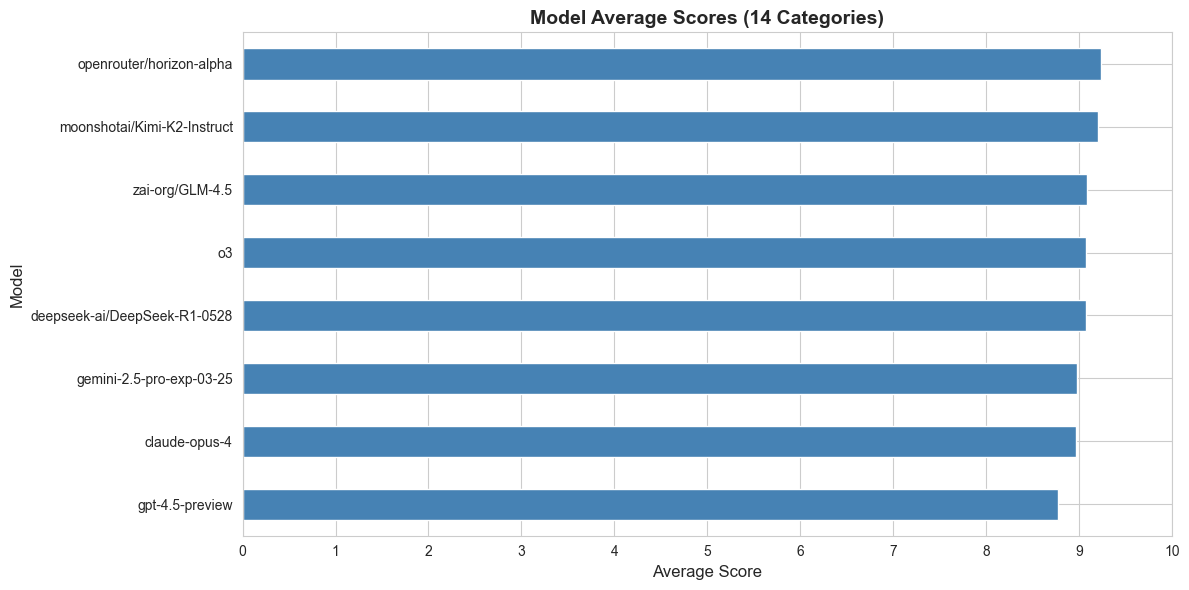

In [93]:
# Model average scores (14 categories only)
category_avg_by_model = model_avg[category_cols].mean(axis=1).sort_values(ascending=True)

plt.figure(figsize=(12, 6))
category_avg_by_model.plot(kind='barh', color='steelblue')
plt.title('Model Average Scores (14 Categories)', fontsize=14, fontweight='bold')
plt.xlabel('Average Score', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.xlim(0, 10)
plt.xticks(np.arange(0, 11, 1))
plt.tight_layout()
plt.show()


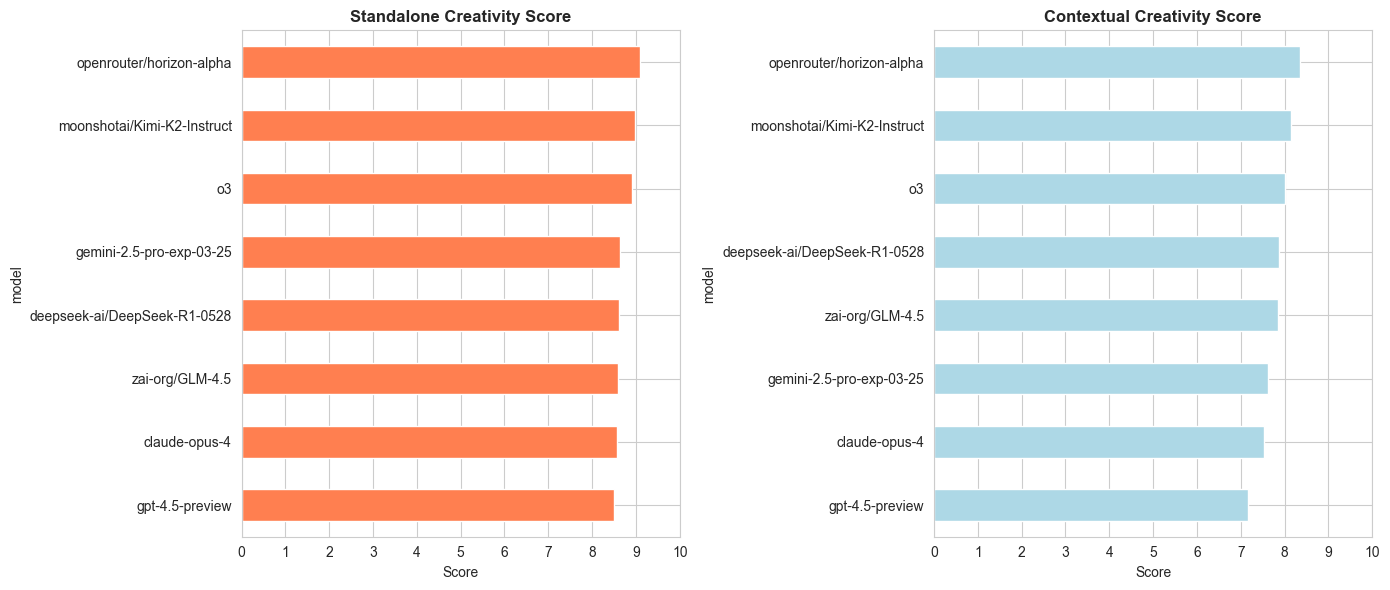

In [94]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

standalone_sorted = model_avg['creativity_standalone_score'].sort_values(ascending=True)
standalone_sorted.plot(kind='barh', ax=axes[0], color='coral')
axes[0].set_title('Standalone Creativity Score', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Score', fontsize=10)
axes[0].set_xlim(0, 10)
axes[0].set_xticks(np.arange(0, 11, 1))

contextual_sorted = model_avg['creativity_contextual_score'].sort_values(ascending=True)
contextual_sorted.plot(kind='barh', ax=axes[1], color='lightblue')
axes[1].set_title('Contextual Creativity Score', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Score', fontsize=10)
axes[1].set_xlim(0, 10)
axes[1].set_xticks(np.arange(0, 11, 1))

plt.tight_layout()
plt.show()


## 2. Category Analysis


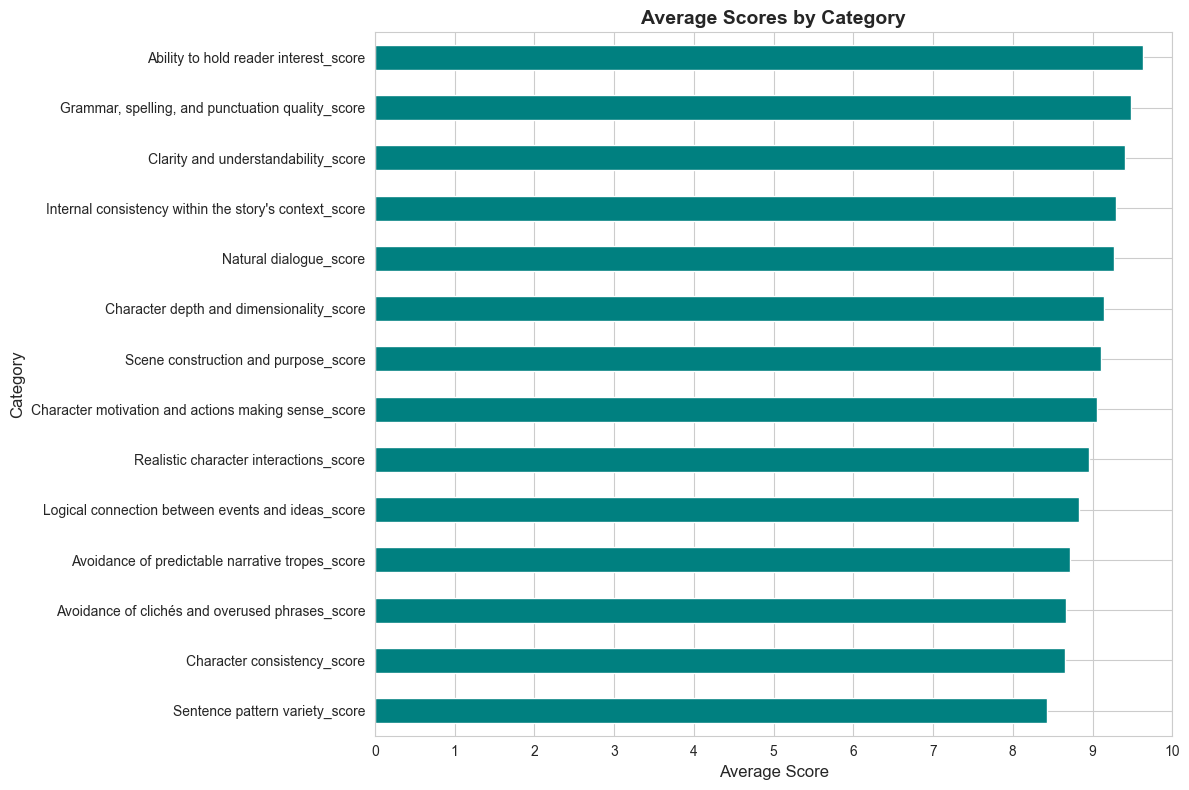

In [95]:
# Average scores by category
category_avg = df[category_cols].mean().sort_values(ascending=True)

plt.figure(figsize=(12, 8))
category_avg.plot(kind='barh', color='teal')
plt.title('Average Scores by Category', fontsize=14, fontweight='bold')
plt.xlabel('Average Score', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.xlim(0, 10)
plt.xticks(np.arange(0, 11, 1))
plt.tight_layout()
plt.show()


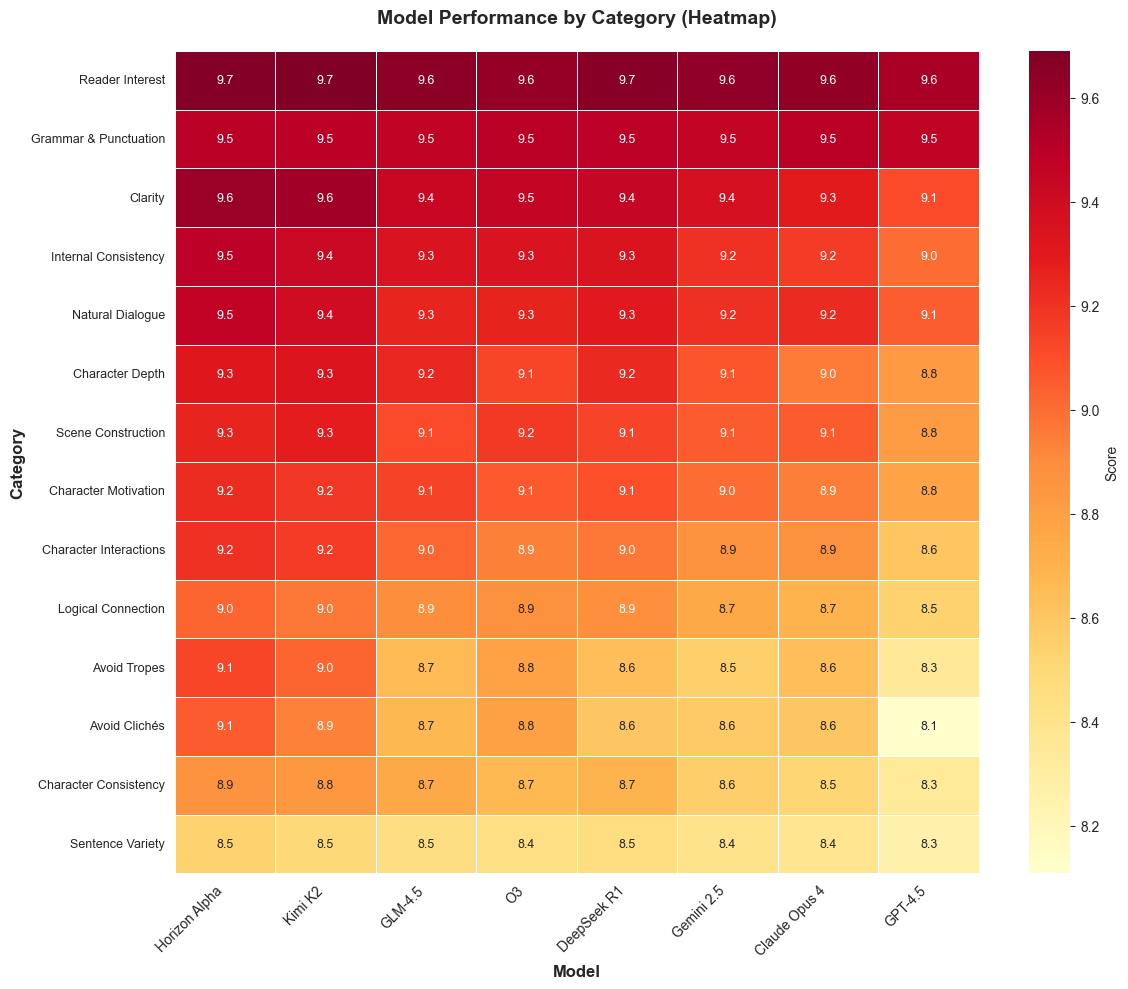

In [96]:
# Model performance by category heatmap
# Create cleaner category names
category_name_mapping = {
    'Grammar, spelling, and punctuation quality_score': 'Grammar & Punctuation',
    'Sentence pattern variety_score': 'Sentence Variety',
    'Avoidance of clichés and overused phrases_score': 'Avoid Clichés',
    'Clarity and understandability_score': 'Clarity',
    'Logical connection between events and ideas_score': 'Logical Connection',
    "Internal consistency within the story's context_score": 'Internal Consistency',
    'Scene construction and purpose_score': 'Scene Construction',
    'Avoidance of predictable narrative tropes_score': 'Avoid Tropes',
    'Ability to hold reader interest_score': 'Reader Interest',
    'Character consistency_score': 'Character Consistency',
    'Character motivation and actions making sense_score': 'Character Motivation',
    'Natural dialogue_score': 'Natural Dialogue',
    'Character depth and dimensionality_score': 'Character Depth',
    'Realistic character interactions_score': 'Character Interactions'
}

# Create cleaner model names
model_name_mapping = {
    'claude-opus-4': 'Claude Opus 4',
    'deepseek-ai/DeepSeek-R1-0528': 'DeepSeek R1',
    'gemini-2.5-pro-exp-03-25': 'Gemini 2.5',
    'gpt-4.5-preview': 'GPT-4.5',
    'moonshotai/Kimi-K2-Instruct': 'Kimi K2',
    'o3': 'O3',
    'openrouter/horizon-alpha': 'Horizon Alpha',
    'zai-org/GLM-4.5': 'GLM-4.5'
}

# Prepare heatmap data
heatmap_data = model_avg[category_cols].T.copy()
heatmap_data.index = [category_name_mapping.get(col, col.replace('_score', '')) for col in category_cols]
heatmap_data.columns = [model_name_mapping.get(col, col) for col in heatmap_data.columns]

# Sort by average score (descending) for better visualization
heatmap_data['avg'] = heatmap_data.mean(axis=1)
heatmap_data = heatmap_data.sort_values('avg', ascending=False).drop('avg', axis=1)

# Sort models by average score
model_avg_scores = heatmap_data.mean().sort_values(ascending=False)
heatmap_data = heatmap_data[model_avg_scores.index]

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt='.1f', 
    cmap='YlOrRd',  # Yellow-Orange-Red colormap (classic heatmap style)
    cbar_kws={'label': 'Score'},
    linewidths=0.5,
    linecolor='white',
    annot_kws={'size': 9}
)
plt.title('Model Performance by Category (Heatmap)', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Model', fontsize=12, fontweight='bold')
plt.ylabel('Category', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()


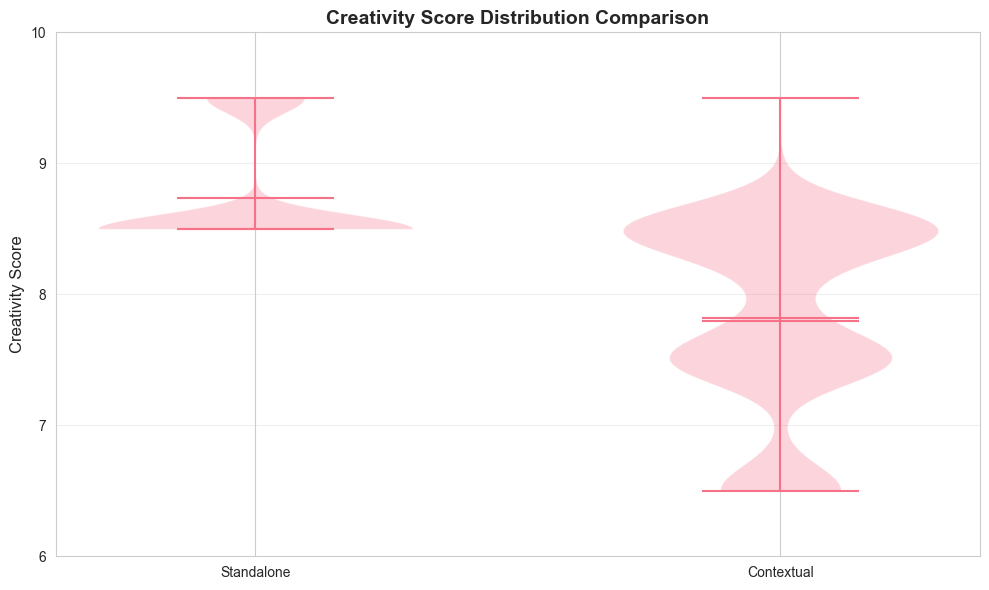

In [97]:
# Distribution comparison: Violin plot
fig, ax = plt.subplots(figsize=(10, 6))
data_to_plot = [df['creativity_standalone_score'], df['creativity_contextual_score']]

# Calculate actual data range with some padding
all_scores = pd.concat([df['creativity_standalone_score'], df['creativity_contextual_score']])
y_min = max(0, all_scores.min() - 0.5)
y_max = min(10, all_scores.max() + 0.5)

parts = ax.violinplot(data_to_plot, positions=[1, 2], widths=0.6, showmeans=True, showmedians=True)
ax.set_xticks([1, 2])
ax.set_xticklabels(['Standalone', 'Contextual'])
ax.set_ylabel('Creativity Score', fontsize=12)
ax.set_title('Creativity Score Distribution Comparison', fontsize=14, fontweight='bold')
ax.set_ylim(y_min, y_max)
# Set yticks with appropriate interval based on range
y_range = y_max - y_min
if y_range <= 3:
    ax.set_yticks(np.arange(np.ceil(y_min), np.floor(y_max) + 1, 0.5))
elif y_range <= 5:
    ax.set_yticks(np.arange(np.ceil(y_min), np.floor(y_max) + 1, 1))
else:
    ax.set_yticks(np.arange(np.ceil(y_min), np.floor(y_max) + 1, 1))
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


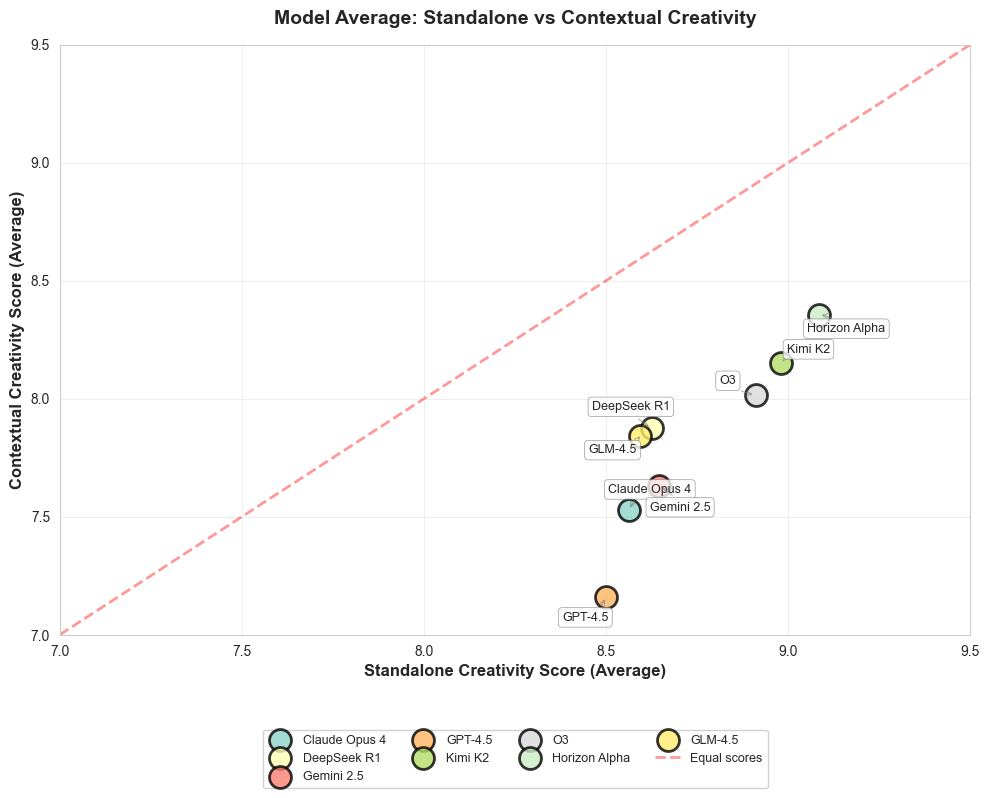

In [ ]:
# Scatter plot: Model averages (Standalone vs Contextual)
fig, ax = plt.subplots(figsize=(10, 8))

# Use model averages for cleaner visualization
model_creativity = df.groupby('model').agg({
    'creativity_standalone_score': 'mean',
    'creativity_contextual_score': 'mean'
})

# Clean model names
model_name_mapping = {
    'claude-opus-4': 'Claude Opus 4',
    'deepseek-ai/DeepSeek-R1-0528': 'DeepSeek R1',
    'gemini-2.5-pro-exp-03-25': 'Gemini 2.5',
    'gpt-4.5-preview': 'GPT-4.5',
    'moonshotai/Kimi-K2-Instruct': 'Kimi K2',
    'o3': 'O3',
    'openrouter/horizon-alpha': 'Horizon Alpha',
    'zai-org/GLM-4.5': 'GLM-4.5'
}

# Use different colors for each model
colors = plt.cm.Set3(np.linspace(0, 1, len(model_creativity)))

# Plot each model with different color
for i, (model, row) in enumerate(model_creativity.iterrows()):
    clean_name = model_name_mapping.get(model, model)
    ax.scatter(row['creativity_standalone_score'], 
               row['creativity_contextual_score'],
               s=250, alpha=0.8, edgecolors='black', linewidth=2,
               color=colors[i], label=clean_name, zorder=3)
    
    # Add model labels with offset to avoid overlap
    # Offset direction varies to spread labels out
    offset_directions = [
        (15, 15), (-15, 15), (15, -15), (-15, -15),
        (20, 10), (-20, 10), (20, -10), (-20, -10)
    ]
    offset_x, offset_y = offset_directions[i % len(offset_directions)]
    
    ax.annotate(clean_name, 
                (row['creativity_standalone_score'],
                 row['creativity_contextual_score']),
                xytext=(offset_x, offset_y), textcoords='offset points',
                fontsize=9, ha='center', va='center',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', 
                         edgecolor='gray', alpha=0.8, linewidth=0.5),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2',
                               color='gray', lw=0.8, alpha=0.6),
                zorder=4)

# Add diagonal line
ax.plot([7, 9.5], [7, 9.5], 'r--', alpha=0.4, linewidth=2, 
        label='Equal scores', zorder=1)

ax.set_xlabel('Standalone Creativity Score (Average)', fontsize=12, fontweight='bold')
ax.set_ylabel('Contextual Creativity Score (Average)', fontsize=12, fontweight='bold')
ax.set_title('Model Average: Standalone vs Contextual Creativity', 
             fontsize=14, fontweight='bold', pad=15)
ax.set_xlim(7, 9.5)
ax.set_ylim(7, 9.5)
ax.set_xticks(np.arange(7, 10, 0.5))
ax.set_yticks(np.arange(7, 10, 0.5))
ax.grid(True, alpha=0.3, zorder=0)

# Place legend below the plot area to avoid overlap
# Use 2 rows with proper spacing to prevent overlap
legend = ax.legend(bbox_to_anchor=(0.5, -0.25), loc='upper center', fontsize=9, 
                   framealpha=0.9, ncol=4, borderaxespad=0.5,
                   columnspacing=2.0, handletextpad=0.8, handlelength=2.0,
                   labelspacing=0.8)

plt.tight_layout()
plt.subplots_adjust(bottom=0.3)  # Add more space at bottom for legend
plt.show()


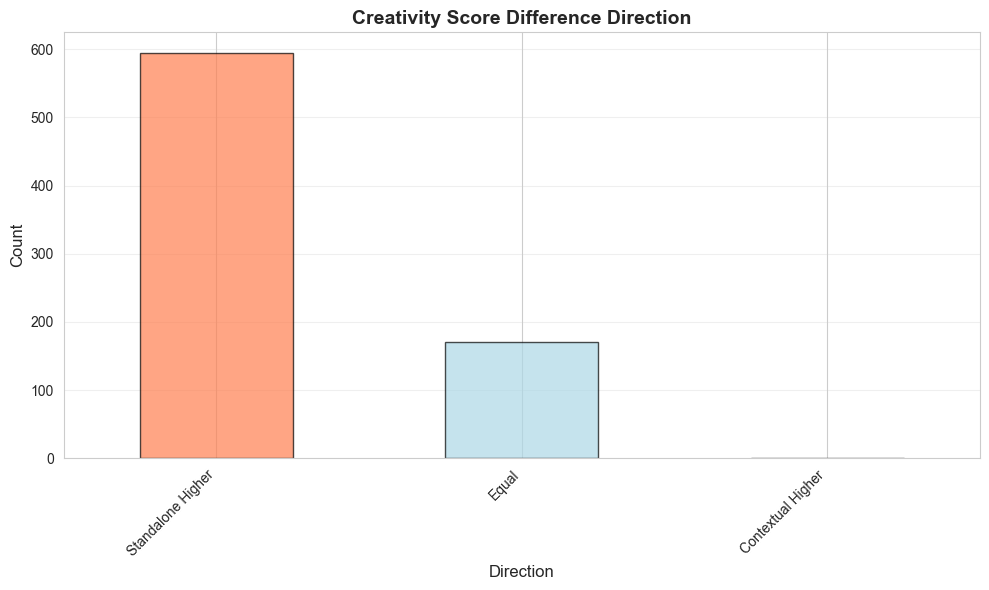


Difference Direction Summary:
difference_direction
Standalone Higher    595
Equal                171
Contextual Higher      1
Name: count, dtype: int64


In [99]:
# Difference direction analysis
# Compare standalone and contextual directly (creativity_difference is absolute value)
df['difference_direction'] = df.apply(
    lambda row: 'Standalone Higher' if row['creativity_standalone_score'] > row['creativity_contextual_score'] 
    else ('Contextual Higher' if row['creativity_standalone_score'] < row['creativity_contextual_score'] 
    else 'Equal'),
    axis=1
)

direction_counts = df['difference_direction'].value_counts()

plt.figure(figsize=(10, 6))
direction_counts.plot(kind='bar', color=['coral', 'lightblue', 'lightgreen'], alpha=0.7, edgecolor='black')
plt.title('Creativity Score Difference Direction', fontsize=14, fontweight='bold')
plt.xlabel('Direction', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\nDifference Direction Summary:")
print(direction_counts)


Overall Correlation between Standalone and Contextual Creativity: 0.440

Note: gpt-4.5-preview has NaN correlation because all standalone scores are identical (no variance).


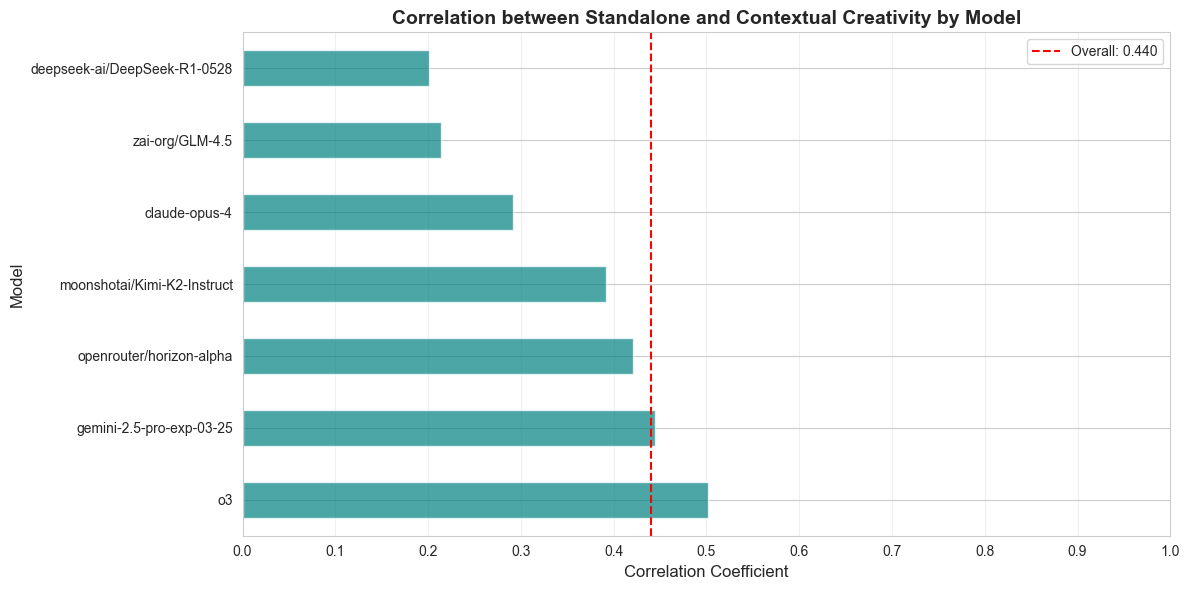


Model-specific Correlations:
model
o3                              0.501
gemini-2.5-pro-exp-03-25        0.445
openrouter/horizon-alpha        0.421
moonshotai/Kimi-K2-Instruct     0.391
claude-opus-4                   0.292
zai-org/GLM-4.5                 0.214
deepseek-ai/DeepSeek-R1-0528    0.201
gpt-4.5-preview                   NaN
dtype: float64


In [100]:
# Correlation analysis
correlation = df['creativity_standalone_score'].corr(df['creativity_contextual_score'])

print(f"Overall Correlation between Standalone and Contextual Creativity: {correlation:.3f}")

# Model-specific correlations
model_correlations = df.groupby('model').apply(
    lambda x: x['creativity_standalone_score'].corr(x['creativity_contextual_score'])
).sort_values(ascending=False)

# Check for models with NaN (no variance in standalone scores)
nan_models = model_correlations[model_correlations.isna()].index
if len(nan_models) > 0:
    print(f"\nNote: {', '.join(nan_models)} has NaN correlation because all standalone scores are identical (no variance).")

# Filter out NaN for plotting
model_correlations_plot = model_correlations.dropna()

plt.figure(figsize=(12, 6))
model_correlations_plot.plot(kind='barh', color='teal', alpha=0.7)
plt.title('Correlation between Standalone and Contextual Creativity by Model', 
          fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.axvline(correlation, color='red', linestyle='--', label=f'Overall: {correlation:.3f}')
plt.legend()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\nModel-specific Correlations:")
print(model_correlations.round(3))


=== Creativity Difference Distribution ===
This histogram shows how much the standalone and contextual creativity scores differ.
The difference is calculated as |standalone - contextual| (absolute value).
  - 0.0: Scores are identical
  - Higher values: Scores differ more



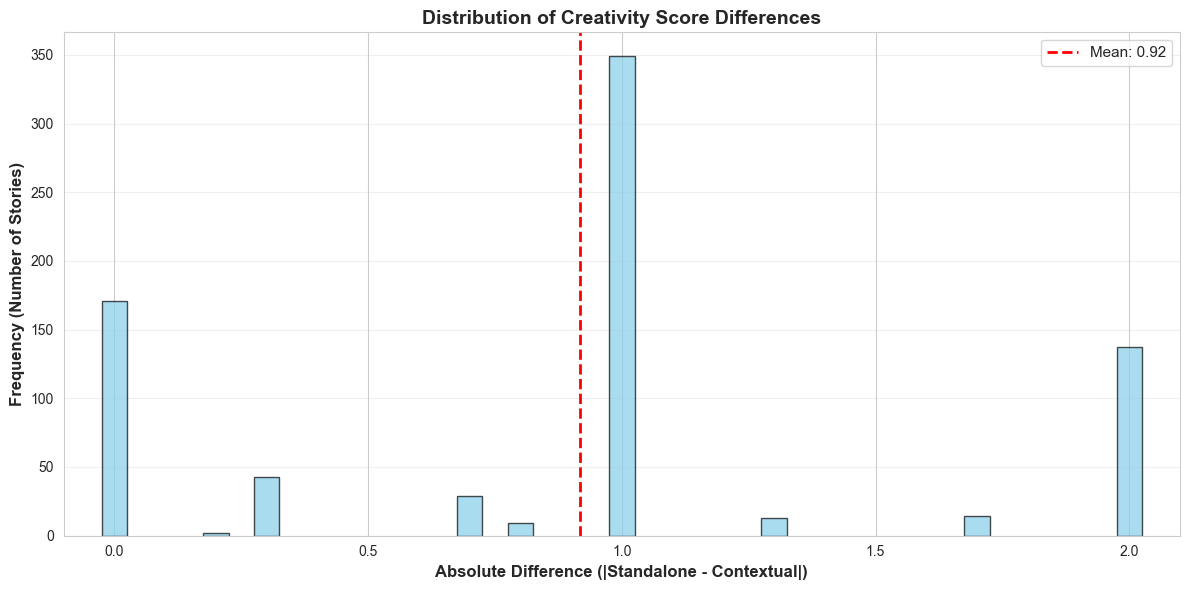


Statistics:
  Mean difference: 0.92
  Std difference: 0.66
  Max difference: 2.00
  Min difference: 0.00
  Stories with no difference (0.0): 171 (22.3%)


In [101]:
# Creativity difference distribution
# This shows the absolute difference between standalone and contextual creativity scores
# Higher values mean the two scores differ more; 0 means they are identical

print("=== Creativity Difference Distribution ===")
print("This histogram shows how much the standalone and contextual creativity scores differ.")
print("The difference is calculated as |standalone - contextual| (absolute value).")
print("  - 0.0: Scores are identical\n  - Higher values: Scores differ more\n")

plt.figure(figsize=(12, 6))
# Count frequency for each unique value to ensure exact positioning
value_counts = df['creativity_difference'].value_counts().sort_index()
plt.bar(value_counts.index, value_counts.values, width=0.05, 
        color='skyblue', edgecolor='black', alpha=0.7, align='center')
plt.xlabel('Absolute Difference (|Standalone - Contextual|)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency (Number of Stories)', fontsize=12, fontweight='bold')
plt.title('Distribution of Creativity Score Differences', fontsize=14, fontweight='bold')
plt.xticks(np.arange(0, 2.5, 0.5))
plt.xlim(-0.1, 2.1)
plt.axvline(df['creativity_difference'].mean(), color='red', linestyle='--', linewidth=2,
            label=f'Mean: {df["creativity_difference"].mean():.2f}')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"\nStatistics:")
print(f"  Mean difference: {df['creativity_difference'].mean():.2f}")
print(f"  Std difference: {df['creativity_difference'].std():.2f}")
print(f"  Max difference: {df['creativity_difference'].max():.2f}")
print(f"  Min difference: {df['creativity_difference'].min():.2f}")
print(f"  Stories with no difference (0.0): {(df['creativity_difference'] == 0).sum()} ({(df['creativity_difference'] == 0).sum() / len(df) * 100:.1f}%)")


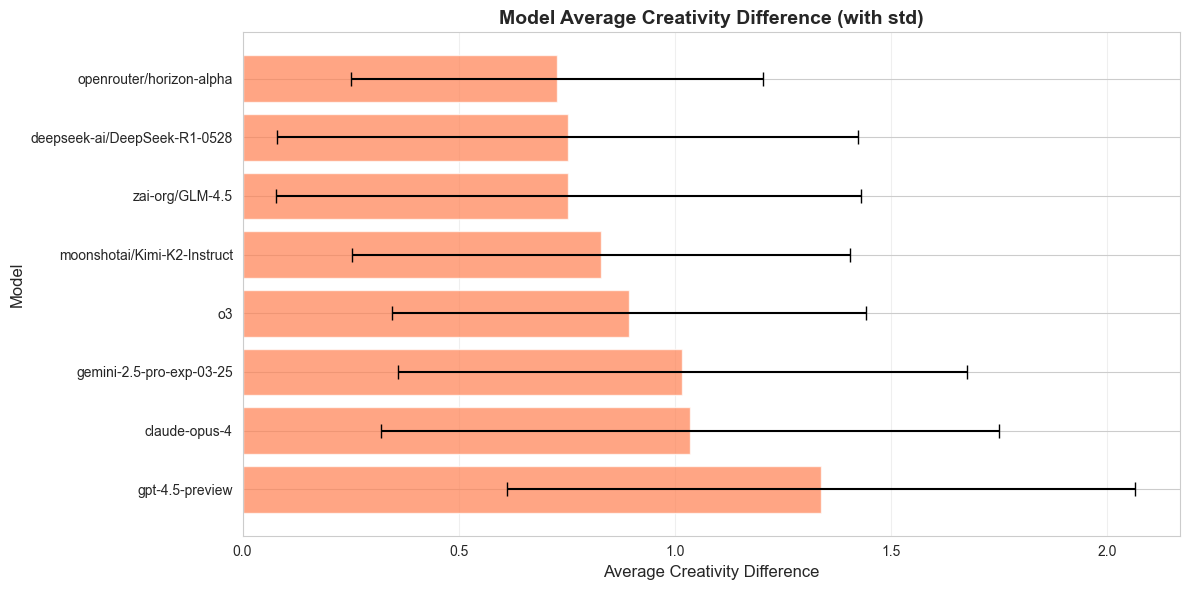

In [102]:
# Model creativity difference
model_diff = df.groupby('model')['creativity_difference'].agg(['mean', 'std']).sort_values('mean', ascending=False)

plt.figure(figsize=(12, 6))
x_pos = range(len(model_diff))
plt.barh(x_pos, model_diff['mean'], xerr=model_diff['std'], color='coral', alpha=0.7, capsize=5)
plt.yticks(x_pos, model_diff.index)
plt.xlabel('Average Creativity Difference', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.title('Model Average Creativity Difference (with std)', fontsize=14, fontweight='bold')
plt.xticks(np.arange(0, 2.5, 0.5))
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


## 4. Influential Categories Analysis


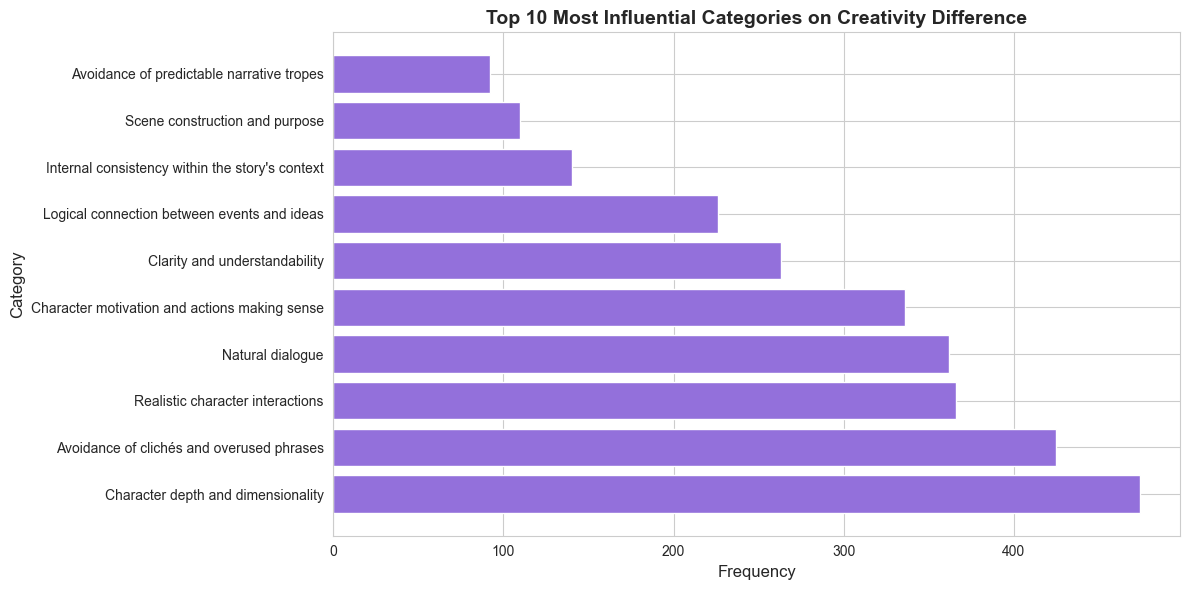


Top 10 Most Influential Categories:
  Character depth and dimensionality: 474
  Avoidance of clichés and overused phrases: 425
  Realistic character interactions: 366
  Natural dialogue: 362
  Character motivation and actions making sense: 336
  Clarity and understandability: 263
  Logical connection between events and ideas: 226
  Internal consistency within the story's context: 140
  Scene construction and purpose: 110
  Avoidance of predictable narrative tropes: 92


In [103]:
# Calculate influential categories frequency
all_categories = []
for categories_str in df['influential_categories'].dropna():
    if categories_str:
        categories = [cat.strip() for cat in categories_str.split(',')]
        all_categories.extend(categories)

category_counts = Counter(all_categories)

# Top 10 categories
top_categories = dict(category_counts.most_common(10))

plt.figure(figsize=(12, 6))
plt.barh(range(len(top_categories)), list(top_categories.values()), color='mediumpurple')
plt.yticks(range(len(top_categories)), list(top_categories.keys()))
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.title('Top 10 Most Influential Categories on Creativity Difference', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nTop 10 Most Influential Categories:")
for cat, count in category_counts.most_common(10):
    print(f"  {cat}: {count}")


## 5. Summary Statistics


In [104]:
# Summary statistics
print("=== Overall Statistics ===")
print(f"Total entries: {len(df)}")
print(f"Number of models: {df['model'].nunique()}")
print(f"\n=== Category Scores ===")
print(f"Average category score: {df[category_cols].mean().mean():.2f}")
print(f"Std category score: {df[category_cols].mean(axis=1).std():.2f}")
print(f"\n=== Creativity Scores ===")
print(f"Average standalone creativity: {df['creativity_standalone_score'].mean():.2f}")
print(f"Average contextual creativity: {df['creativity_contextual_score'].mean():.2f}")
print(f"Average difference: {df['creativity_difference'].mean():.2f}")
print(f"\n=== Entries with Difference ===")
print(f"Entries with difference > 0: {(df['creativity_difference'] > 0).sum()}")
print(f"Entries with difference = 0: {(df['creativity_difference'] == 0).sum()}")
print(f"Entries with influential categories: {df['influential_categories'].notna().sum()}")


=== Overall Statistics ===
Total entries: 767
Number of models: 8

=== Category Scores ===
Average category score: 9.05
Std category score: 0.36

=== Creativity Scores ===
Average standalone creativity: 8.74
Average contextual creativity: 7.82
Average difference: 0.92

=== Entries with Difference ===
Entries with difference > 0: 596
Entries with difference = 0: 171
Entries with influential categories: 558


In [105]:
# Model summary statistics
summary_stats = df.groupby('model').agg({
    'creativity_standalone_score': ['mean', 'std'],
    'creativity_contextual_score': ['mean', 'std'],
    'creativity_difference': ['mean', 'std'],
    'index': 'count'
}).round(2)

summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns.values]
summary_stats = summary_stats.rename(columns={'index_count': 'num_entries'})

print("\n=== Model Summary Statistics ===")
print(summary_stats)



=== Model Summary Statistics ===
                              creativity_standalone_score_mean  \
model                                                            
claude-opus-4                                             8.56   
deepseek-ai/DeepSeek-R1-0528                              8.62   
gemini-2.5-pro-exp-03-25                                  8.65   
gpt-4.5-preview                                           8.50   
moonshotai/Kimi-K2-Instruct                               8.98   
o3                                                        8.91   
openrouter/horizon-alpha                                  9.08   
zai-org/GLM-4.5                                           8.59   

                              creativity_standalone_score_std  \
model                                                           
claude-opus-4                                            0.24   
deepseek-ai/DeepSeek-R1-0528                             0.33   
gemini-2.5-pro-exp-03-25                     